In [1]:
%matplotlib inline

from __future__ import division
import csv
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from scipy import signal
import pandas as pd

In [2]:

# with open('WindData.csv', 'rb') as csvfile:
#     spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    
#     for row in spamreader:
#         Speed.append(row[4])
        
def get_wind_data(file_name='WindData.csv',col=4):
    """
    returns wind data froma colum as specified in the 
    options (remember start at 0)
    """
    Speed = []
    with open(file_name, 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    
        for row in spamreader:
            Speed.append(row[col])
        
    return Speed
   
Speed = get_wind_data('Filton_wind_record.csv',col=5) # Filton_wind_record col=9   WindData col = 4   



In [3]:

Pmatrix = []
with open('ProbabilityMatrix.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    
    for row in spamreader:
        Pmatrix.append(row)
        
Pmatrix = np.array(Pmatrix)

#print(Pmatrix)

def make_P_matrix(file_name='ProbabilityMatrix.csv'):
    """
    Returns a Pmatrix as np.array given by the csv
    file specified
    """
    Pmatrix = []
    with open(file_name, 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    
        for row in spamreader:
            Pmatrix.append([float(i) for i in row])
            
    return np.array(Pmatrix)

print(make_P_matrix('ProbabilityMatrix.csv'))

[[ 0.5   0.2   0.2   0.1   0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.4   0.5   0.1   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.1   0.3   0.5   0.1   0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.2   0.5   0.2   0.1   0.    0.    0.    0.    0.  ]
 [ 0.    0.1   0.    0.6   0.25  0.05  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.7   0.15  0.15  0.3   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.2   0.5   0.2   0.2   0.1   0.  ]
 [ 0.    0.    0.    0.    0.1   0.    0.4   0.5   0.1   0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.3   0.1   0.3   0.5   0.1   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.1   0.2   0.5   0.2 ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.1   0.    0.6   0.3 ]]


In [4]:
spd = []
for i in Speed:
    try:
        spd.append(float(i)*0.514444)
        
    except ValueError:
        print i + " is not a float"
        

        
        


WindSpeed is not a float


In [5]:
def Turb_power(s,Cutin=4,Rated=15,Cutoff=25,TurbName = "V90/3MW"):
    """Describes the power output of a wind turbine as function of windspeed
    Cutin is the lower wind speed limit, Cutoff is the upper windspeed limit 
    and Limit is the point at which the power no longer increases as the 
    nominal power has been reached.
    
    Example Vestas V90
    Cut In:  4 m/s
    Rated:   15 m/s
    Cut Out: 25 m/s
    
    for partial range of V90/3MW we use to 6th order polynomial fitted to the curve
    """
    if TurbName == "V90/3MW":
        if s < Cutin:
            return 0
        elif s < 11:
            x = np.arange(4,12)
            y = np.array([75, 187, 348, 574, 875, 1257, 1688, 2118])
            p = np.polyfit(x, y, 6)
            return np.polyval(p,s)
        elif s < 17:
            x = np.arange(11,18)
            y = np.array([2118, 2514, 2817, 2958, 2994, 2999, 3000])
            p = np.polyfit(x, y, 6)
            return np.polyval(p,s)
        elif s < Cutoff:
            return 3000
        else:
            return 0
    else:
        factor = Turb_factor(Power,rating)
        if s < Cutin:
            return 0
        elif s < Rated:
            return (s**3)*factor
        elif s < Cutoff:
            return Rated**3*factor
        else:
            return 0

def Turb_factor(Power,rating):
    """Given a Rated power and rating speed, computes the conversion factor"""
    return float(Power)/rating**3



[[  5.55555556e-01   2.22222222e-02   4.44444444e-02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  7.76397516e-04   3.29192547e-01   1.63043478e-01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.16459627e-03   9.12267081e-02   2.60093168e-01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.42857143e-01
    1.42857143e-01   1.42857143e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.00000000e+00
    0.00000000e+00   0.00000000e+00]]


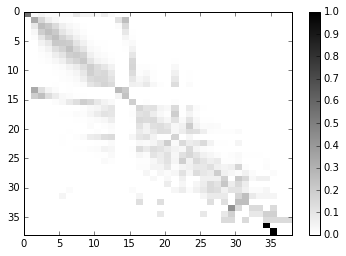

In [9]:
## Analysis
# interval = spd[0:24]

# plt.plot(interval)
# plt.xlabel('time')
# plt.ylabel('speed')
# plt.show()


# f, Pxx_den = signal.periodogram(spd)
# plt.semilogy(f, Pxx_den)
# #plt.axis([0,1,0,100])
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

from collections import Counter, defaultdict
from itertools import count


def tmatrix(lst):
    """from http://stackoverflow.com/questions/28013878/calculate-transition-matrix-of-letters?lq=1
    defaultdict that'll produce a unique index for each unique character
    encountered in lst
    """
    indices = defaultdict(count().next)
    b = np.zeros([len(set(lst)),len(set(lst))])
    
    Ct = Counter(zip(lst, lst[1:])) # zip together consecutive elements of the list

    for (x, y), c in iter(sorted(Ct.iteritems())): # make sorted iteration to generate sorted trasition matrix
        #print (x,y), c
        b[indices[x]][indices[y]] = float(c)
       
    res = dict((v,k) for k,v in indices.iteritems())
    
    b = np.array(b)
    
    # Normalise 
    for i in range(len(b)):
        b[i] = b[i]/float(b.sum(axis=1)[i])
    
    return b, indices

T_mat, indicies =  tmatrix(spd)
#print indicies
print T_mat

#print indicies.values()
#print np.shape(T_mat)

    

#from pylab import *
#z = rand(10, 25)
#z = np.ma.masked_array(z,mask=z>0.8)
c = plt.pcolor(T_mat)
plt.set_cmap('gray_r')
plt.colorbar()
plt.axis([0,len(T_mat),0,len(T_mat)])
ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])
#c = pcolor(T, edgecolors='w', linewidths=1)

#savefig('T_matrix_data.png')
plt.show()

np.savetxt("T_matrix_all38.csv", T_mat, delimiter=",")

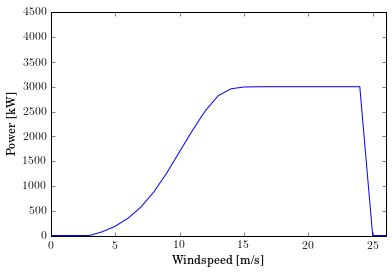

In [22]:
pwr = []
for i in range(0,270):
    pwr.append(Turb_power(i/10))
        
plt.plot(pwr)
plt.axis([0, 26, 0, 3500])
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)
plt.xlabel('Windspeed [m/s]')
plt.ylabel('Power [kW]')

#plt.rcParams["figure.figsize"] = [15 , 5]
#plt.show()

#plt.savefig('D:\Phd\DP\desta3ination_path.jpg',  format='jpg')

In [23]:
def add_error(x):
    """Adds relative max error to the wind forecast,
    returns lower and upper bounds, lb and ub """
    for i in range(len(x)):
        pass
        
    

In [24]:
def provide_speed_range(x,stepsize=0.2,number_of_steps=7):
    """Turns a vector of wind speeds into an array of wind speeds
    seperated by the windspeed step.
    
    Ensure wind speed vector is 2 dimensional np array.
    """
    x = np.array(x,ndmin = 2)
   
    if number_of_steps%2 == 0:
        UL = stepsize*number_of_steps/2.0
        wind_range = np.array(np.arange(UL,-UL,-stepsize),ndmin = 2)
        #print np.shape(wind_range) 
        return np.transpose(wind_range)+x
        
    elif number_of_steps%2 == 1:
        UL = stepsize*np.floor(number_of_steps/2.0)
        # divide by >1 to get right number of steps
        range_w = np.arange(-UL,(UL+stepsize/1.1),stepsize)
        wind_range = np.array(range_w,ndmin = 2)
        #print np.shape(wind_range) 
        return np.transpose(wind_range)+x
    


In [25]:
x = np.array([[1,1,1],[2,2,2],[3,3,3]])
y = np.array([0.5,0.6,0.7],ndmin=2)

print(x+y)

[[ 1.5  1.6  1.7]
 [ 2.5  2.6  2.7]
 [ 3.5  3.6  3.7]]


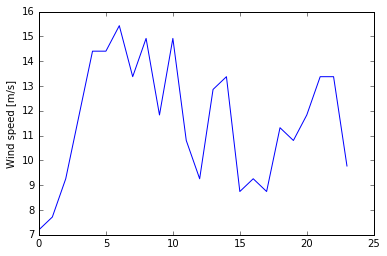

NameError: name 'P' is not defined

In [13]:
 
plt.plot(spd[24:48])
plt.ylabel('Wind speed [m/s]')
plt.show()

realisations = [10, 6, 7, 5, 1, 14, 3, 7, 8, 9, 14, 4, 12, 14, 1, 1, 3, 1, 0, 3, 7, 11, 14, 8, 3]
J_max = 15
init = 45

def plot_realisations(init,spd,realisations,J_max,stepsize=0.2):
    print('Plotting for: ', len(realisations), ' of wind states')
    W = provide_speed_range(spd[init:init+len(realisations)],J_max,error='bad')
    x = np.arange(0,len(realisations))
    #print(W)
    y = W[realisations,x]
    plt.plot(x,y)
    plt.plot(x,spd[init:init+len(realisations)])
    plt.xlabel('Time of day (h)')
    plt.ylabel('Wind speed (m/s)')
    plt.show()
    
#plot_realisations(24,spd,[10, 6, 7, 5, 1, 14, 3, 7, 8, 9, 14, 4, 12, 14, 1, 1, 3, 1, 0, 3, 7, 11, 14, 8, 3],17,0.2)


def new_state(prob,total=None):
    if not total:
        total = sum(prob)
    
    cd = np.zeros((1,len(prob)))
    for i in range(len(prob)):
        cd[0,i] = sum(prob[0:i+1])
    
    val =  np.random.uniform(0,total)
  
    for i in range(len(prob)):
        if val <= cd[0,i]:
            return i

def gen_state(s,P,T=24):
    """Generates a series of states for 24 time steps"""
    states = []
    for j in range(T):
        states.append(s)
        s = new_state(P[s])
    return states


#P,J_max = make_P_matrix('T_matrix_all.csv')#'TurkeyMatrix.csv') # P_matrix_all.csv')  #ProbabilityMatrix.csv')#')T_matrix_all.csv

SS = scipy.signal.savgol_filter(spd[init:init+len(realisations)+20],15,2) 
SS = SS[0:len(realisations)]
SS[0] = spd[init]
for i in range(100):
    realisations = gen_state(int(J_max/2),P,T=24)
    W = provide_speed_range(SS,J_max,error='extreme')
    x = np.arange(0,len(realisations))
    #print(W)
    y = W[realisations,x]
    plt.plot(x,y,color = 'k',alpha = 0.05)
    #plt.plot(x,spd[init:init+len(realisations)])

r, = plt.plot(x,y,color = 'k',alpha = 0.05)
t, = plt.plot(spd[init:init+24],color='b')
f, = plt.plot(SS,color='r')
plt.axis([0,24,0,40])
plt.xlabel('Time of day (h)')
plt.ylabel('Wind speed (m/s)')
#handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=[r,t,f],labels=['realisations','true','forecast'],loc='best')
plt.show()

## Data analysis of Wind 

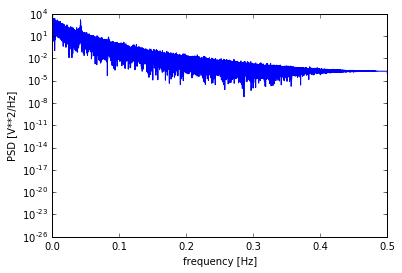

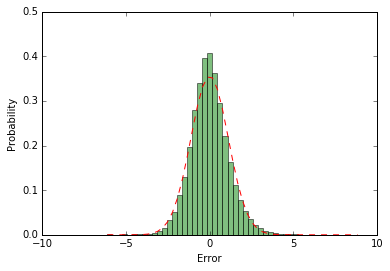

8.84542253285 -6.10842378269


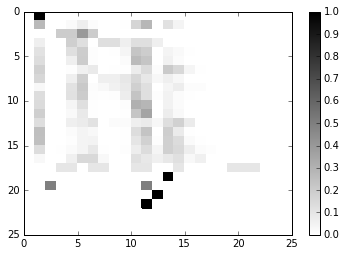

[-0.0, 0.71208791978779851, 7.1208791978779846, -2.848351679151194, 4.9846154385145898, -2.1362637593633953, 2.1362637593633953, 3.5604395989389923, -4.2725275187267906, 6.4087912780901863, -5.6967033583023881, 5.6967033583023881, -6.4087912780901863, -0.71208791978779851, 4.2725275187267906, 7.8329671176657838, 8.5450550374535812, -4.9846154385145898, 2.848351679151194, -3.5604395989389923, 1.424175839575597, -1.424175839575597]


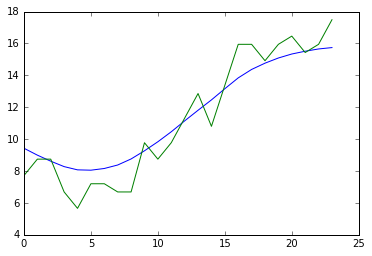

In [175]:
import scipy

def discretise_wind(x, Hmax , Hmin, factor):
    # discretise the levels of storage
    G = [round(i*factor)/factor for i in x]
    return np.array(G)
    #return round(x*factor)/factor
    
# SAVGOL 
#S = scipy.signal.savgol_filter(spd,9,3) 

# Low Pass
b, a = scipy.signal.butter(1, 0.1, 'low') #4, 100, 'low'
S = scipy.signal.filtfilt(b, a, spd)


f, Pxx_den = signal.periodogram(S)
plt.semilogy(f, Pxx_den)
#plt.axis([0,1,0,100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

# Median filter
#S = scipy.signal.medfilt(spd,5)

err = spd-S

# Stat analysis of err
n, bins, patches = plt.hist(err, bins=50,normed=1, facecolor='green', alpha=0.5)

y = mlab.normpdf(bins, err.mean(), err.std())
plt.plot(bins, y, 'r--')
plt.xlabel('Error')
plt.ylabel('Probability')
plt.axis([-10,10,0,0.5])
plt.show()


Hmax = max(err)
Hmin = min(err)
print Hmax,Hmin
factor = float(21/ (Hmax-Hmin))
Err = discretise_wind(err, Hmax , Hmin, factor)

#print sorted(Err)
T_mat, indicies =  tmatrix(Err )

# for i in range(len(T_mat)):
#     T_mat[i] = T_mat[i]/float(T_mat.sum(axis=1)[i])

c = pcolor(T_mat)
set_cmap('gray_r')
colorbar()
#axis([0,47,0,47])
ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])
#c = pcolor(T, edgecolors='w', linewidths=1)

#savefig('T_matrix_data.png')
show()

#np.shape(spd)
print  indicies.keys()

 
plt.plot(S[48:72])
plt.plot(spd[48:72])
plt.show()

# print res

# for i in range(200): 
#     V = gen_state(3,T_mat,24)
#     x =[]
#     for k in V:
#         x.append(res[k])
#     y = S[48:72]+x
#     plt.plot(y,alpha = 0.02,color = 'k')
    
# plt.show()

8.54505503745 21
7.83296711767 20
7.12087919788 19
6.40879127809 18
5.6967033583 17
4.98461543851 16
3.56043959894 15
2.13626375936 14
1.42417583958 13
4.27252751873 12
-0.0 11
-0.712087919788 10
-2.84835167915 9
-3.56043959894 8
-4.27252751873 7
2.84835167915 6
-1.42417583958 5
-2.13626375936 4
-4.98461543851 3
-5.6967033583 2
0.712087919788 1
-6.40879127809 0
[21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[8.5450550374535812, 7.8329671176657838, 7.1208791978779846, 6.4087912780901863, 5.6967033583023881, 4.9846154385145898, 3.5604395989389923, 2.1362637593633953, 1.424175839575597, 4.2725275187267906, -0.0, -0.71208791978779851, -2.848351679151194, -3.5604395989389923, -4.2725275187267906, 2.848351679151194, -1.424175839575597, -2.1362637593633953, -4.9846154385145898, -5.6967033583023881, 0.71208791978779851, -6.4087912780901863]
{0: 8.5450550374535812, 1: 7.8329671176657838, 2: 7.1208791978779846, 3: 6.4087912780901863, 4: 5.6967033583023881, 5: 4.98

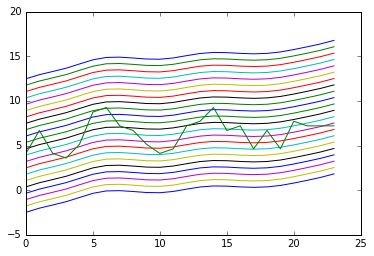

In [176]:




new =[]
vals = []
for w in sorted(indicies, key=indicies.get, reverse=True):
    print w, indicies[w]
    new.append(indicies[w])
    vals.append(w)

print new
print vals

dictionary = dict(zip(range(0,len(new)), vals))
print dictionary

plot(np.transpose(S[0:24]+np.transpose(np.array(vals,ndmin=2))))
plot(spd[0:24])
show()

def get_windstate(x):
    """
    Takes a forecast and a realistion
    and an error band and returns the 
    corresonding states
    """
    key, value = min(indicies.iteritems(), key=lambda (_, v): abs(v - target))
    pass



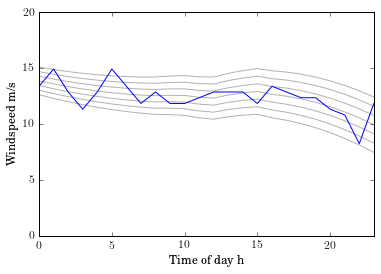

In [103]:
def provide_speed_range(x,number_of_steps=7,error='constant'):
    """Turns a vector of wind speeds into an array of wind speeds
    seperated by the windspeed step.
    
    Error = None uses 10% of mean of sample
    
    Ensure wind speed vector is 2 dimensional np array.
    """
    
    x = np.array(x,ndmin = 2)
    z = x.size
  
    
    if error == 'constant':
        error_size = np.linspace(np.mean(x)*0.1,np.mean(x)*0.1,z)
    elif error == 'good':
        error_size = np.linspace(np.mean(x)*0.1,np.mean(x)*0.16,z)
    elif error == 'bad':
        error_size = np.linspace(np.mean(x)*0.1,np.mean(x)*0.20,z)
    elif error == 'extreme':
        error_size = np.linspace(np.mean(x)*0.15,np.mean(x)*0.3,z)
    else:
        error_size = np.linspace(np.mean(x)*0.1,np.mean(x)*0.1,z)
    
      
   
    if number_of_steps%2 == 0:
        UL = (number_of_steps-1)/2.0
         #= np.array(,ndmin = 2)
    elif number_of_steps%2 == 1:
        UL = (number_of_steps-1)/2.0
        
    
    wind_range = []
    for i in error_size:
        col = np.linspace(-i,i,number_of_steps)
        wind_range.append(col)
        
        
    np.array(wind_range)
   
    
    return np.transpose(wind_range)+x
    
    
        
#     elif number_of_steps%2 == 1:
#         UL = stepsize*np.floor(number_of_steps/2.0)
#         # divide by >1 to get right number of steps
#         range_w = np.arange(-UL,(UL+stepsize/1.1),stepsize)
#         wind_range = np.array(range_w,ndmin = 2)
#         #print np.shape(wind_range) 
#         return np.transpose(wind_range)+x
SS = scipy.signal.savgol_filter(spd[0:24],15,2)    
y = SS
x = np.arange(0,24)
Y = provide_speed_range(y,number_of_steps=7,error = 'bad')
for i in range(7):
    plt.plot(x,Y[i],color = 'k',alpha = 0.3)
plt.show


import scipy
#S = scipy.signal.medfilt(spd[0:24])
#plt.plot(S)
plt.plot(spd[0:24])
plt.ylabel('Windspeed m/s')
plt.xlabel('Time of day h')
plt.axis([0,23,0,20])
plt.show()

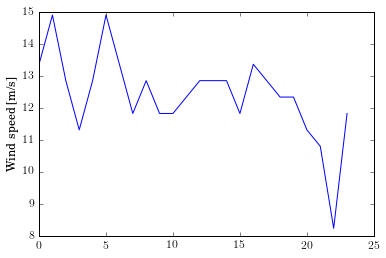

[[ 13.975544  15.518876  13.4611    11.917768  13.4611    15.518876
   13.975544  12.432212  13.4611    12.432212  12.432212  12.946656
   13.4611    13.4611    13.4611    12.432212  13.975544  13.4611
   12.946656  12.946656  11.917768  11.403324   8.831104  12.432212]
 [ 13.775544  15.318876  13.2611    11.717768  13.2611    15.318876
   13.775544  12.232212  13.2611    12.232212  12.232212  12.746656
   13.2611    13.2611    13.2611    12.232212  13.775544  13.2611
   12.746656  12.746656  11.717768  11.203324   8.631104  12.232212]
 [ 13.575544  15.118876  13.0611    11.517768  13.0611    15.118876
   13.575544  12.032212  13.0611    12.032212  12.032212  12.546656
   13.0611    13.0611    13.0611    12.032212  13.575544  13.0611
   12.546656  12.546656  11.517768  11.003324   8.431104  12.032212]
 [ 13.375544  14.918876  12.8611    11.317768  12.8611    14.918876
   13.375544  11.832212  12.8611    11.832212  11.832212  12.346656
   12.8611    12.8611    12.8611    11.832212  13.3

In [136]:
from __future__ import division
def provide_speed_range(x,stepsize=0.2,number_of_steps=7):
    """Turns a vector of wind speeds into an array of wind speeds
    seperated by the windspeed step"""
   
    if number_of_steps%2 == 0:
        print("Even number of wind states permitted, not supported")
        pass
    elif number_of_steps%2 == 1:
        UL = stepsize*np.floor(number_of_steps/2.0)
        wind_range = np.array(np.arange(UL,-UL,-stepsize),ndmin = 2)
        return x+np.transpose(wind_range) 
   
        

init =0
A = np.array(spd[init:init+24])
plt.plot(A)
plt.ylabel('Wind speed [m/s]')
plt.show()
B =[]
for i in range(7):
    B.append(A)
    
print provide_speed_range(A,stepsize=0.2,number_of_steps=7)
#print(G.transpose())
#print(np.dot(G.transpose,A))
    
# D =[]
# for i in range(24):
#     D.append(addit)
    
# D = np.array(D).T    
# A = np.array(B)
# E =  A+D
# for i in range(7):
#     plt.plot(E[i,0:20])

# plt.show()
# #plt.show()
# Pwr = np.zeros_like(E)
# Cost = np.zeros_like(E)

# for idx, val in np.ndenumerate(E):
#     Pwr[idx] = Turb_power(val)

# Tarriff = np.random.rand(1,24)

# for idx, val in np.ndenumerate(Pwr):
#     Cost[idx] = max( (2500-val)*Tarriff[0,idx[1]]
#                      ,0)

# for i in range(7):
#     plt.plot(Cost[i,0:24])
    
# plt.ylabel('Cost [GBP]')
# plt.show()

# plt.plot(Tarriff)
# plt.show()


In [ ]:
Pwr = np.zeros_like(E)
Cost = np.zeros_like(E)

for idx, val in np.ndenumerate(E):
    Pwr[idx] = Turb_power(val)

Tarriff = np.random.rand(1,24)
    
    
for idx, val in np.ndenumerate(Pwr):
    Cost[idx] = max(2500-val,0)

for i in range(7):
    plt.plot(Cost[i,0:24])

plt.show()


In [ ]:
A = np.array([1,2,5,9,3], ndmin=2)
B = np.array([0.1,0.5,0.9], ndmin=2)
B = np.transpose(B)
print(A+B)


In [6]:
print random.randint(0,20)

3


In [ ]:
Q_matrix = []
with open('TurkeyMatrix.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    
    for row in spamreader:
#         new_row = []
#         for i in row:
#             try:
#                 new_row.append(float(i))
#             except ValueError:
#                 new_row.append(i)
                
#                 #print i + " is not a float"
        Q_matrix.append([float(i) for i in row])
            
#         print new_row
        
q = np.array(Q_matrix)

In [ ]:
#print np.e**(q*55)

In [ ]:
print q

In [86]:
pd = np.array([[0.5, 0.2,   0.2,  0.1,   0,   0 ],
               [0.4, 0.5, 0.1,   0,   0,   0],
               [0.2, 0.3, 0.5, 0.1,   0,   0],
               [0,0,0.2,0.5,0.2,0.1],
               [0,0.1,0,0.6,0.25,0.05],
               [0,0,0,0.7,0.15,0.15]])


def new_state(prob,total=None):
    if not total:
        total = sum(prob)
    
    cd = np.zeros((1,len(prob)))
    for i in range(len(prob)):
        cd[0,i] = sum(prob[0:i+1])
    
    val =  np.random.uniform(0,total)
  
    for i in range(len(prob)):
        if val <= cd[0,i]:
            return i
                      

In [87]:
import numpy as np

def gen_state(s,P,T=24):
    """Generates a series of states for 24 time steps"""
    states = []
    for j in range(T):
        states.append(s)
        s = new_state(P[s])
    return states


def gen_state2(t,T=24):
    """Generates a series of states for 24 time steps"""
    states = []
    for j in range(T):

        s = np.random.normal(0,1+j/4)
        states.append(np.random.normal(0,1+j/4))

        return states


print gen_state(1,T_mat,24)

[1, 0, 17, 0, 18, 10, 5, 5, 5, 10, 5, 5, 10, 4, 10, 4, 5, 4, 4, 5, 5, 10, 4, 5]


In [ ]:
from scipy.stats import norm


In [ ]:
normpdf = [0.0088, 0.0270, 0.0648, 0.1210,0.1760, 0.1995, 0.1760, 0.1210, 0.0648,0.0270, 0.0088, 0.0022]

norm_matrix  = []
for i in range(12):
    norm_matrix.append(norm.pdf([range(-6,7)], loc=0, scale=i+1))

norm_matrix = np.array(norm_matrix)



In [ ]:
from tqdm import tqdm
Summary = np.zeros((1000,24))
for i in tqdm(range(1000)):
    j = gen_state(1,T_mat)
    #j = gen_state2(6,norm_matrix)
    Summary[i] = j
    plt.plot(j,'k-', alpha=0.01)
    

plt.axis([0,23,0,20])
plt.ylabel('Windspeed')
plt.xlabel('Time of day')
plt.show()

In [ ]:
plt.hist(Summary[:,3])

In [ ]:
plt.hist(Summary[:,20])
plt.hist(Summary[:,21])
plt.hist(Summary[:,23])
plt.show()

## regression fitting

In [ ]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt

N = 1000 # number of data points
t = np.linspace(0, 4*np.pi, N)
data = 3.0*np.sin(t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)
guess_phase = 0

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(t+x[1]) + x[2] - data
est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_std*np.sin(t+est_phase) + est_mean

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import pylab as plt

N = 1000 # number of data points
t = np.linspace(0, 4*np.pi, N)
data = 3.0*np.sin(t*5+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

guess_freq = 4.5
guess_amplitude = 3*np.std(data)/(2**0.5)
guess_phase = 0
guess_offset = np.mean(data)

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

# create the function we want to fit
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

# now do the fit
popt, pcov = curve_fit(my_sin, t, data, p0=p0)

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = my_sin(t, *p0)

# recreate the fitted curve using the optimized parameters
data_fit = my_sin(t, *popt)

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()

print popt

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import pylab as plt

N = 48 # number of data points
#t = np.linspace(0, 4*np.pi, N)
#data = 3.0*np.sin(t*5+0.001) +2.0*np.sin(t*2+0.1)  + 0.5 + np.random.randn(N) # create artificial data with noise
t = np.arange(0,N)
data = spd[0:N]


guess_freq1 = 5
guess_amplitude1 = 3*np.std(data)/(2**0.5)
guess_phase1 = 0
guess_freq2 = 2
guess_amplitude2 = 3*np.std(data)/(2**0.5)
guess_phase2 = 0
guess_offset = np.mean(data)

p0=[guess_freq1, guess_amplitude1, guess_phase1,
    guess_freq2, guess_amplitude2, guess_phase2,
    guess_offset]

# create the function we want to fit
def my_sin(x, freq1, amplitude1, phase1, freq2, amplitude2, phase2, offset):
    return np.sin(x * freq1 + phase1) * amplitude1 +np.sin(x * freq2 + phase2) * amplitude2 + offset

# now do the fit
#popt, pcov = curve_fit(my_sin, t, data, p0=None)
popt, pcov = curve_fit(my_sin,t , data,)

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = my_sin(t, *p0)

# recreate the fitted curve using the optimized parameters
data_fit = my_sin(t, *popt)

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
# plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()

#plt.plot(np.arange(0,48),spd[0:48], '.')
#plt.plot(data_fit, label='after fitting')
#plt.plot(data_first_guess, label='first guess')
#plt.legend()
plt.show()

print popt

In [ ]:
 #I - Q/l, where I is the identity matrix (of the same size as Q) and l is the smallest element on the diagonal of Q

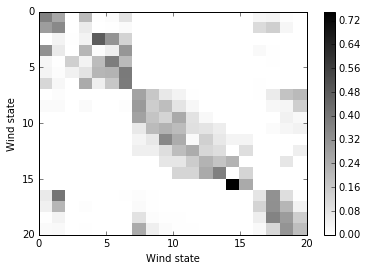

In [10]:

Q = make_P_matrix('windMatrix.csv')
l = min(Q.diagonal())
P = np.eye(20) - Q/l


from pylab import *
#z = rand(10, 25)
#z = np.ma.masked_array(z,mask=z>0.8)
c = pcolor(P)
set_cmap('gray_r')
colorbar()
axis([0,20,0,20])
ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])
#c = pcolor(T, edgecolors='w', linewidths=1)

savefig('T_matrix_data.png')
ylabel('Wind state')
xlabel('Wind state')
show()

np.savetxt("P_matrix_all.csv", P, delimiter=",")